In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784', version = 1)

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
digits['data'].iloc[1,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

In [22]:
x = np.array(digits['data'])/255
y = digits['target']

In [23]:
y = np.array(y, dtype = np.float64)
y.dtype

dtype('float64')

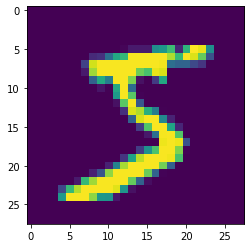

In [24]:
plt.imshow(x[0].reshape(28,28))

In [25]:
x_valid, x_train, x_test = x[:5000],x[5000:60000],x[6000:]
y_valid, y_train, y_test = y[:5000],y[5000:60000],y[6000:]


In [26]:
x_train.shape, x_train.dtype

((55000, 784), dtype('float64'))

In [27]:
y

array([5., 0., 4., ..., 4., 5., 6.])

In [28]:
# y = y.astype(np.int32)
x_train.shape[1]

784

In [29]:
keras.backend.clear_session()

In [30]:
model = keras.models.Sequential([keras.layers.InputLayer(input_shape = x_train.shape[1:]),
                                 keras.layers.Dense(50, 'relu'),
                                 keras.layers.Dense(50, 'relu'),
                                 keras.layers.Dense(10, 'softmax')])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer = 'sgd' ,metrics= ['accuracy'], loss = keras.losses.sparse_categorical_crossentropy)

In [33]:
history = model.fit(x_train,y_train, epochs = 30, validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7273 - accuracy: 0.7960 - val_loss: 0.3626 - val_accuracy: 0.8982
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3310 - accuracy: 0.9049 - val_loss: 0.2842 - val_accuracy: 0.9228
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.9198 - val_loss: 0.2463 - val_accuracy: 0.9290
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2430 - accuracy: 0.9299 - val_loss: 0.2181 - val_accuracy: 0.9382
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9381 - val_loss: 0.1965 - val_accuracy: 0.9466
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1962 - accuracy: 0.9433 - val_loss: 0.1832 - val_accuracy: 0.9498
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9477 - val_loss: 0.1703 - val_accuracy: